# Simple Linear Regression on Calories Consumed Data

**Calories_consumed->** Predict weight gained using *calories consumed*.

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### Load Dataset

In [2]:
wg = pd.read_csv('calories_consumed.csv')

#### EDA on dataset

In [3]:
# Check first 5 records
wg.head(5)

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


In [4]:
# Check last 5 records
wg.tail(5)

,Weight gained (grams),Calories Consumed
9,1100,3900
10,100,1670
11,150,1900
12,350,2700
13,700,3000


In [5]:
# Check for data types, non-null values & memory usage
wg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Weight gained (grams)  14 non-null     int64
 1   Calories Consumed      14 non-null     int64
dtypes: int64(2)
memory usage: 352.0 bytes


In [6]:
# Get central tendency, dispersion and shape of dataset’s distribution
wg.describe()

,Weight gained (grams),Calories Consumed
count,14.000000,14.000000
mean,357.714286,2340.714286
std,333.692495,752.109488
min,62.000000,1400.000000
25%,114.500000,1727.500000
50%,200.000000,2250.000000
75%,537.500000,2775.000000
max,1100.000000,3900.000000


In [7]:
# Checking Null values
wg.isnull().sum() * 100 / wg.shape[0]

Weight gained (grams)    0.0
Calories Consumed        0.0
dtype: float64

<font size = 3 color = darkblue>There are no NULL values in the dataset, hence it is clean.</font>

In [8]:
# Check for Skewness of all dataset columns
from scipy import stats
print("Skewness of Calories Consumed is", stats.skew(wg['Calories Consumed']))
print("Skewness of Weight gained (grams) is", stats.skew(wg['Weight gained (grams)']))

Skewness of Calories Consumed is 0.5825596600237767
Skewness of Weight gained (grams) is 1.1169767190368756


<font size = 3 color = darkblue>As skewness for *Calories Consumed* is between -0.5 and 0.5, the distribution is approximately symmetric. As skewness for *Weight Gained* is greater than 1, the distribution is highly skewed. </font>

In [9]:
# Check for the column labels of the DataFrame
wg.columns

Index(['Weight gained (grams)', 'Calories Consumed'], dtype='object')

In [10]:
# Check the dimensions of the DataFrame
wg.shape

(14, 2)

In [11]:
# Check for the random sample from the DataFrame
wg.sample(5)

,Weight gained (grams),Calories Consumed
4,300,2500
6,128,1400
5,110,1600
0,108,1500
7,62,1900


#### Visualize data

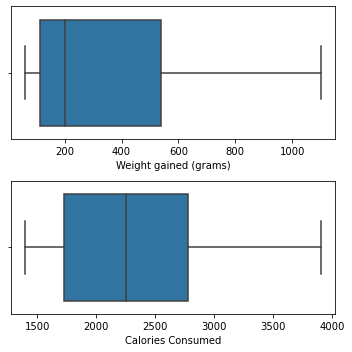

In [12]:
# Check for Outliers in dataset
fig, axs = plt.subplots(2, figsize = (5, 5))
plt1 = sns.boxplot(wg['Weight gained (grams)'], ax = axs[0])
plt2 = sns.boxplot(wg['Calories Consumed'], ax = axs[1])
plt.tight_layout()

<font size = 3 color = darkblue>There are no outliers present in the data.</font>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013B6CB0FEC8>,
      dtype=object)

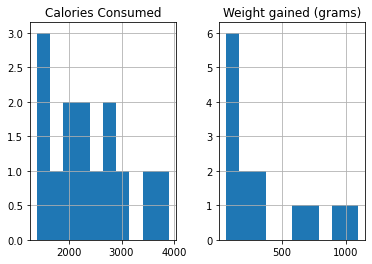

In [13]:
# Check for data normalization using histogram
wg.hist(column = ["Weight gained (grams)", "Calories Consumed"])

#### Correlation Analysis

In [14]:
wg.corr(method = 'pearson')

,Weight gained (grams),Calories Consumed
Weight gained (grams),1.000000,0.946991
Calories Consumed,0.946991,1.000000


The correlation between Calories consumed and weight gained is high (94%)

In [15]:
# Assign data to variables
x = wg['Calories Consumed']
y = wg['Weight gained (grams)']

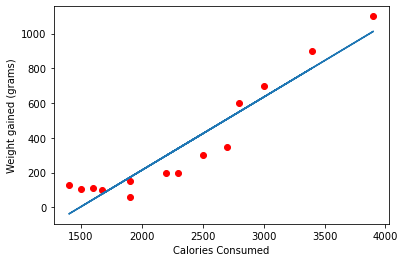

In [16]:
# Create Scatter plot
plt.scatter(x, y, color = 'red')

# m = slope, b = intercept
m, b = np.polyfit(x, y, 1)

# Add line of best fit
plt.plot(x, m*x + b)
plt.xlabel('Calories Consumed')
plt.ylabel('Weight gained (grams)')
plt.show()

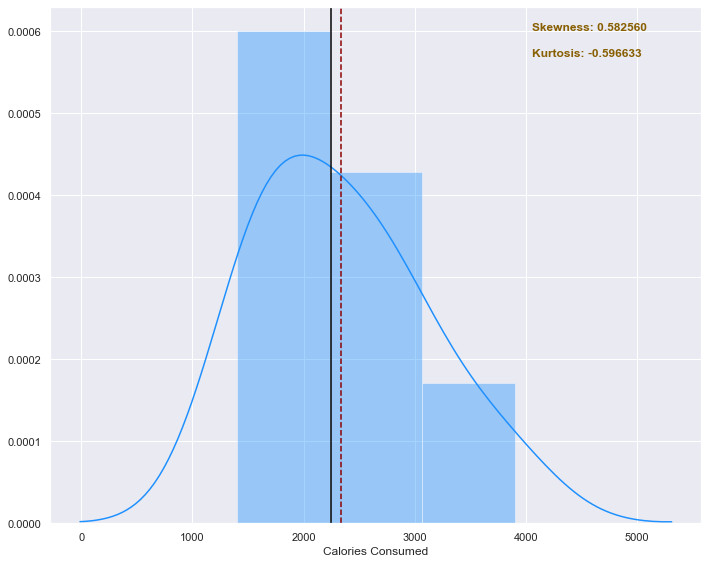

In [17]:
sns.set(color_codes = True)

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

sns.distplot(x, color = "dodgerblue")
plt.axvline(np.mean(x), color = 'darkred', linestyle = '--')
plt.axvline(np.median(x), color = 'black', linestyle = '-')

plt.text(0.74, 0.97, s = "Skewness: %f" % stats.skew(x),\
        transform=ax.transAxes, fontweight = 'demibold', fontsize = 12, horizontalalignment = 'left',\
        verticalalignment = 'top', color = 'xkcd:poo brown')
plt.text(0.74, 0.92, s = "Kurtosis: %f" % stats.kurtosis(x),\
        transform=ax.transAxes, fontweight = 'demibold', fontsize = 12, horizontalalignment = 'left',\
        verticalalignment = 'top', color = 'xkcd:poo brown')

plt.tight_layout()

plt.show()

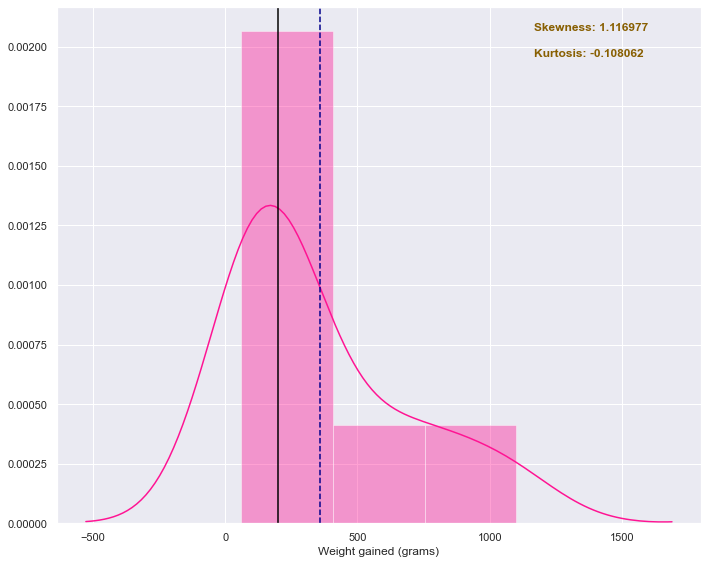

In [18]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

sns.distplot(y, color = "deeppink");
plt.axvline(np.mean(y), color = 'darkblue', linestyle = '--')
plt.axvline(np.median(y), color = 'black', linestyle = '-')

plt.text(0.74, 0.97, s = "Skewness: %f" % stats.skew(y),\
        transform=ax.transAxes, fontweight = 'demibold', fontsize = 12, horizontalalignment = 'left',\
        verticalalignment = 'top', color = 'xkcd:poo brown')   #, backgroundcolor = 'white'
plt.text(0.74, 0.92, s = "Kurtosis: %f" % stats.kurtosis(y),\
        transform=ax.transAxes, fontweight = 'demibold', fontsize = 12, horizontalalignment = 'left',\
        verticalalignment = 'top', color = 'xkcd:poo brown')

plt.tight_layout()
plt.show()

<font size = 3 color = darkblue>From the above plots, we can say that *Delivery Time* data is **fairly** distributed and *Sorting Time* data is **positively** skewed. There is no *outlier* in both the columns as there is no data point outside the *minimum and maximum value*.</font>

#### Build Simple Linear Regression Model

In [19]:
# Converting X to numpy.array
x = np.array(x).reshape(-1, 1)

In [20]:
#split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [21]:
# Create linear regression object
regr = LinearRegression()
regr

LinearRegression()

In [22]:
# Fitting model
regr.fit(X_train, y_train)

LinearRegression()

In [23]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
y_pred

array([176.39732382, 523.15280008,  46.36402022])

In [24]:
# The coefficients
print('Coefficients: ', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients:  [0.43344435]
Mean squared error: 11576.08
Coefficient of determination: -0.05


In [25]:
predict = regr.predict(x)

In [26]:
predict

array([   3.01958569,  349.77506195,  826.56384181,  306.43062742,
        436.46393101,   46.36402022,  -40.32484885,  176.39732382,
        566.49723461, 1043.28601447,   76.70512439,  176.39732382,
        523.15280008,  653.18610368])

In [27]:
score = r2_score(y_test, y_pred)
score

-0.05024945975631301

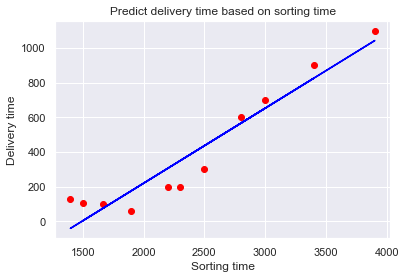

In [28]:
#visualize the training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regr.predict(X_train), color = "blue")
plt.title("Predict delivery time based on sorting time")
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")
plt.show()

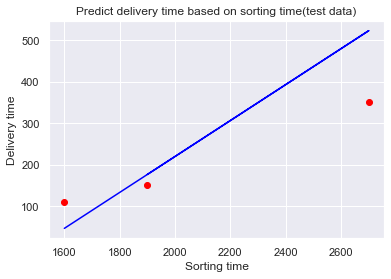

In [29]:
#visualize test results
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, regr.predict(X_test), color = "blue")
plt.title("Predict delivery time based on sorting time(test data)")
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")
plt.show()